# Final Project
---------------------------------------------------------------------------------------------------------------------------

Title: Bank Marketing

Author: David Ortega Lozano

Subject: Machine Learning

Date: 09/06/2025

---------------------------------------------------------------------------------------------------------------------------


## Data Set
### Description of the Data Set:

For this project, I am going to use the Bank Marketing database, specifically the bank-additional-full.csv file, the most recent and complete version of the database. This data set collects in 20 variables personal data of 45211 customers of a Portuguese bank as well as information about the marketing campaigns used on them to predict whether or not the customer will subscribe to an installment deposit. The database has 17 variables in total, of which: 6 are numeric integer variables, to describe from the age of the customer to the number of times the customer has been contacted; 5 are categorical variables, which describe the customer as well as the method of contact or whether previous campaigns have been successful; 4 are binary variables, which indicate whether or not the client has loans and the outcome of whether or not the client ends up subscribing to an installment deposit; 2 are date variables, which record when the client was last contacted; and 4 numeric variables with decimals, extra with respect to the original database, which record the values of external economic indicators.

### Why I am Interested in it:

I am a junior student of Computer Engineering, next year I will finish my degree and I am already looking for internships to do during this last year. However, the world of computer science is immense and I don't know what sector I want to work in when I finish my studies. This database is a clear example of how artificial intelligence can be applied in a company and when it was proposed to me it seemed interesting as a challenge, and to have the experience to see if I really want to dedicate myself to be a data analyst.

### Data Set's Link:

https://archive.ics.uci.edu/dataset/222/bank+marketing

### Introductory Summary of a Published Work with this Data Set:

I have chosen to employ the Introductory Paper from the database, “A data-driven approach to predict the success of bank telemarketing”, published by Sérgio Moro, P. Cortez, P. Rita. in 2014, in the journal Decision Support Systems.

This paper presents an intelligent decision support system (DSS) based on data mining to predict the success of telemarketing calls in long-term deposit banking campaigns. Using a real dataset from a Portuguese bank (2008-2013), the authors initially worked with 150 attributes related to customers, products and socioeconomic conditions. Through a semi-automatic selection process, it was reduced to 22 relevant variables. Four classification models were compared: logistic regression, decision trees, neural networks and support vector machines. Neural networks offered the best performance, with an AUC of 0.80, allowing the bank to contact only half of the customers and still capture 79% of the interested parties. In addition, the authors applied sensitivity analysis and rule extraction to interpret the model, highlighting key factors such as Euribor rate, call type (inbound/outbound) and agent experience. This approach allows campaigns to be optimized by reducing costs and improving the effectiveness of customer contact.

## Jupiter Notebook
### Import of all necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

### Database import and transformation:

#### 1. Database import:

The first thing to do after preparing the environment with the necessary libraries is to import the database and display the header to check that it has been entered properly.

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
original = df
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

#### 2. Database study:

Next, we proceed to study the database, to check that there are no null or erroneous values (such as negative ages) and that all data types are correct.

In [3]:
print(df.info())
print(df.describe())
print(df['y'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())
    print('-' * 40)

job: 12 unique values
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------
marital: 4 unique values
['married' 'single' 'divorced' 'unknown']
----------------------------------------
education: 8 unique values
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------
default: 3 unique values
['no' 'unknown' 'yes']
----------------------------------------
housing: 3 unique values
['no' 'yes' 'unknown']
----------------------------------------
loan: 3 unique values
['no' 'yes' 'unknown']
----------------------------------------
contact: 2 unique values
['telephone' 'cellular']
----------------------------------------
month: 10 unique values
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
----------------------------------------
day_of_week: 5

As it has been observed in this analysis, the database does not have any null value, all the data seem to be within a correct range and we see that there are 9 times more negative results than positive in the prediction that we want to address in this study, which indicates that it is unbalanced and that it will have to be taken into account when dividing the training and testing sets. The only flaw that can be observed in the database is that the variables that appear as binary in the documentation are categorical with the values “yes”, “no” and there is also the value “unknow”.

#### 3. Database Transformation:

The next step is to transform the database to make it easier to interpret by the prediction models. The objective is that by transforming the categorical variables into binary variables and standardizing the scale of the numerical variables, the accuracy rate will be improved.

In [5]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['contact'] = df['contact'].map({'telephone': 0, 'cellular': 1})
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome'], drop_first=True)

In [6]:
dfScaled = df
scaler = StandardScaler()
cols_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

dfScaled[cols_to_scale] = scaler.fit_transform(dfScaled[cols_to_scale])

In [7]:
dfScaled.head

<bound method NDFrame.head of             age  contact  duration  campaign     pdays  previous  \
0      1.533034        0  0.010471 -0.565922  0.195414 -0.349494   
1      1.628993        0 -0.421501 -0.565922  0.195414 -0.349494   
2     -0.290186        0 -0.124520 -0.565922  0.195414 -0.349494   
3     -0.002309        0 -0.413787 -0.565922  0.195414 -0.349494   
4      1.533034        0  0.187888 -0.565922  0.195414 -0.349494   
...         ...      ...       ...       ...       ...       ...   
41183  3.164336        1  0.292025 -0.565922  0.195414 -0.349494   
41184  0.573445        1  0.481012 -0.565922  0.195414 -0.349494   
41185  1.533034        1 -0.267225 -0.204909  0.195414 -0.349494   
41186  0.381527        1  0.708569 -0.565922  0.195414 -0.349494   
41187  3.260295        1 -0.074380  0.156105  0.195414  1.671136   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  ...  month_may  \
0          0.648092        0.722722       0.886447   0.712460  ...      

#### 4. Training and Testing Split:

Finally, the database is divided into four groups: on the one hand, the 53 variables that will be used to train and carry out the prediction; and on the other hand, the variable to be predicted, “y”. These two groups are further divided into two, creating a training set with 70% of the data and a test set with the remaining 30%. Since only one tenth of the cases the prediction is positive, it has been taken into account so that the proportion is maintained in the training and test sets.

In [8]:
x = df.drop('y', axis=1)
xScaled = dfScaled.drop('y', axis=1)
Y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=0, stratify=Y)
xScaled_train, xScaled_test, y_train, y_test = train_test_split(xScaled, Y, test_size=0.3, random_state=0, stratify=Y)

### Exploratory Data Analysis and Visualizations:

The first thing to do is to measure the correlation between the variables and the data to be predicted. To do this, a correlation matrix is made between the numerical variables and the variable 'y', which allows us to see not only the correlation between the variables but also the distribution of each one of them.

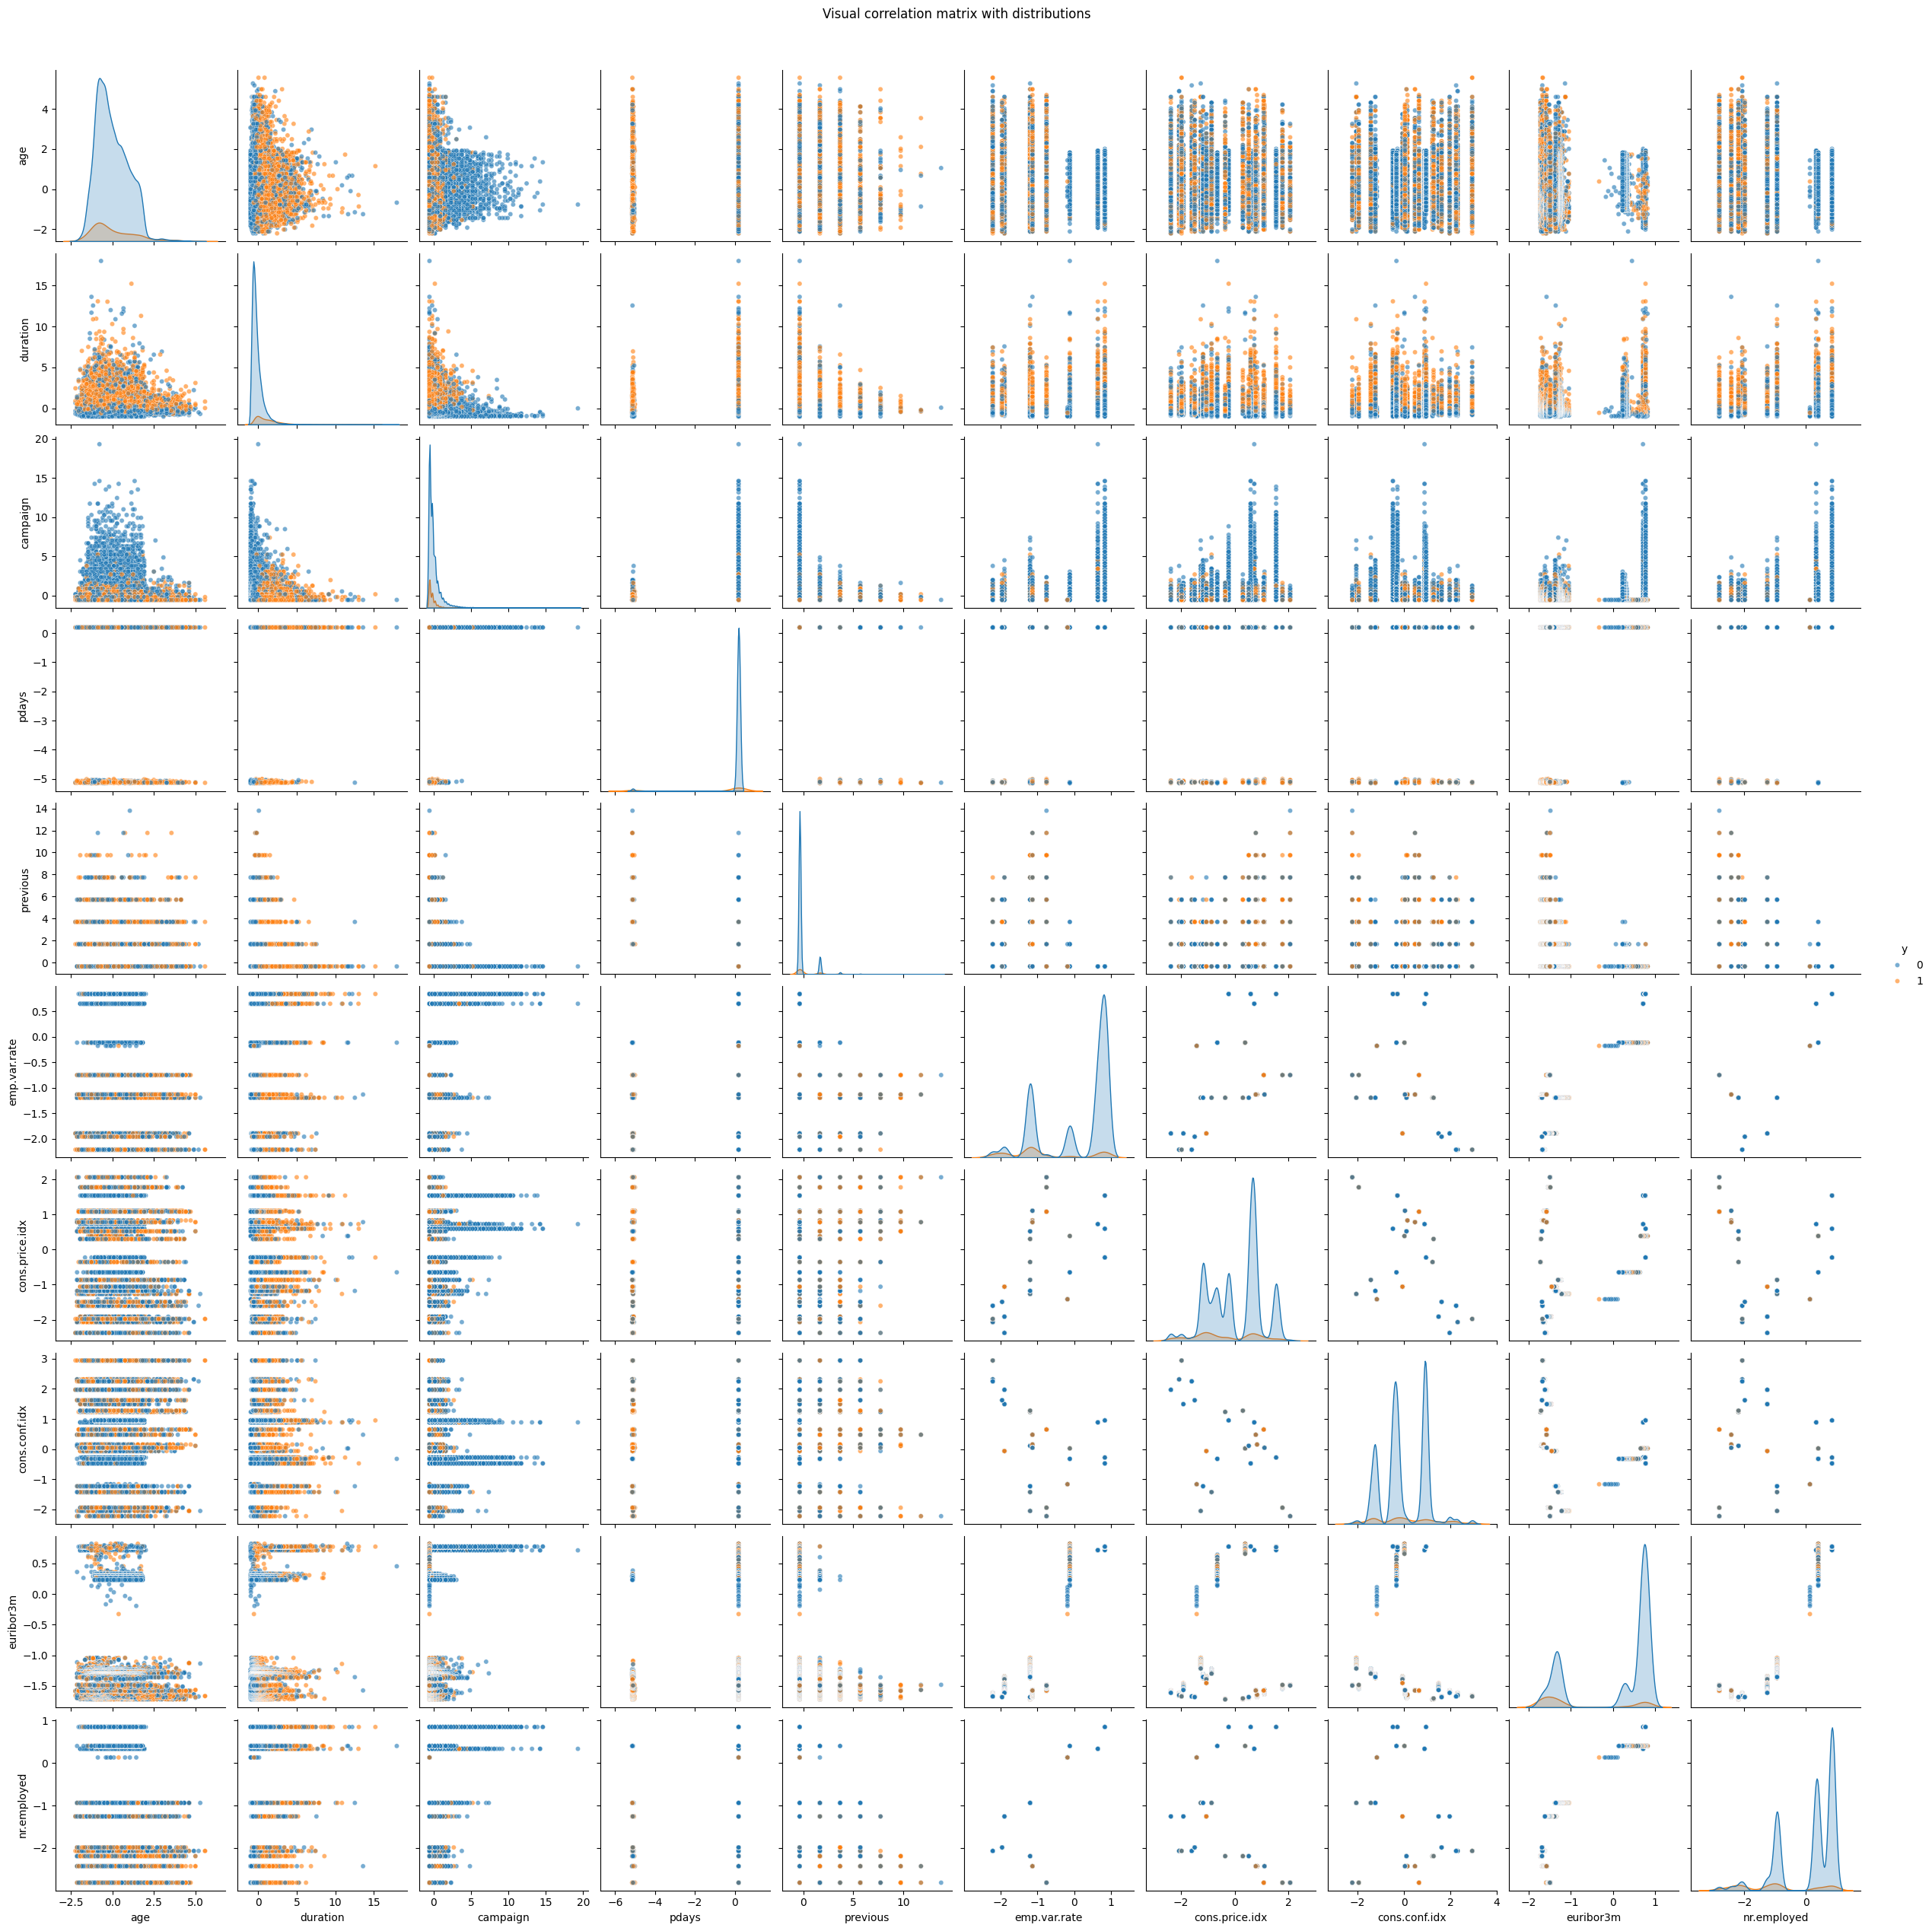

In [9]:
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

df_subset = df[num_cols + ['y']]

sns.pairplot(df_subset, diag_kind='kde', hue='y', plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Visual correlation matrix with distributions', y=1.02)
plt.show()

In [10]:
correlation_matrix = df_subset.corr()

print(correlation_matrix)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   
y               0.030399  0.405274 -0.066357 -0.324914  0.230181   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968       

Although there is no high correlation between the variables and the expected outcome, it can be observed that although low, the variables with the highest correlation with 'y' are: duration, pdays, nr.employed, euribor3m, emp.var.rate and previous with values of 0.405274, -0.354678, -0.324914, -0.307771, -0.298334 and 0.230181 respectively.

The next step is to analyze the categorical variables, for which the distribution between the values will be represented in bar graphs, distinguishing between those with a positive and negative value of the outcome variable.

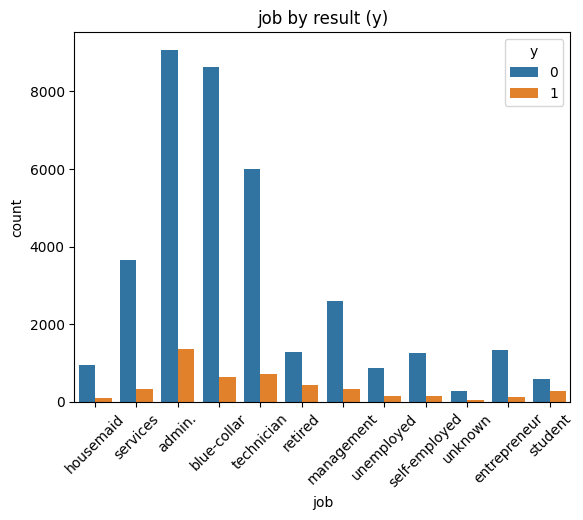

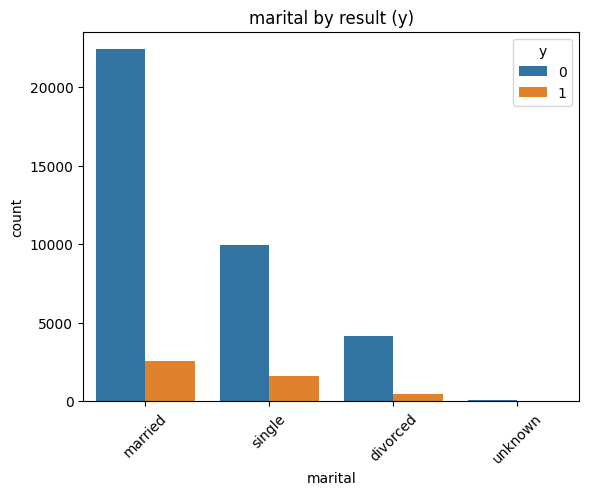

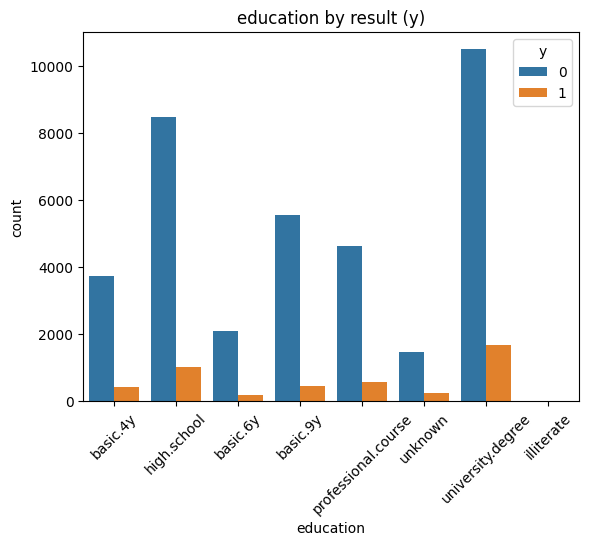

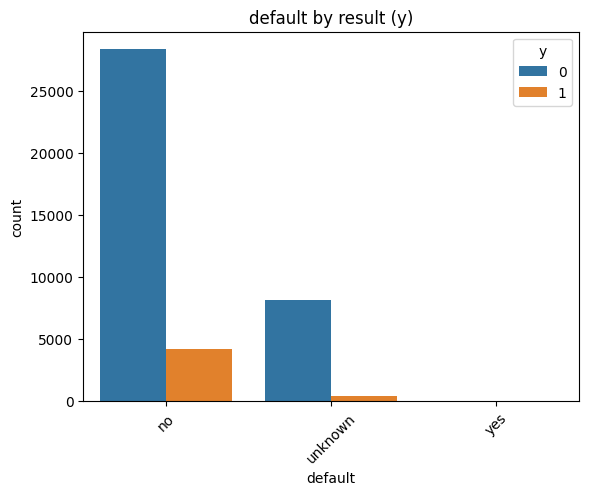

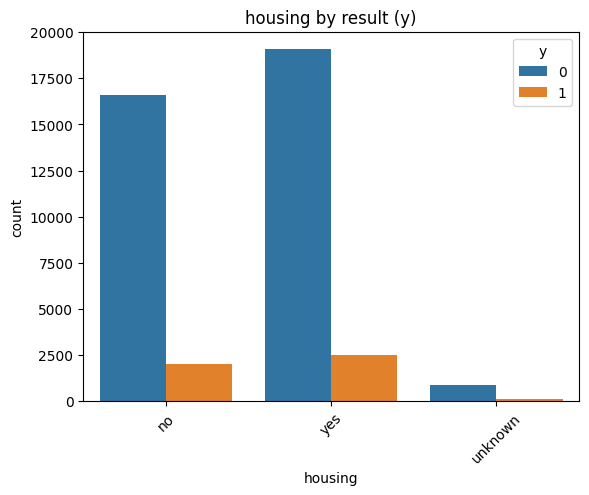

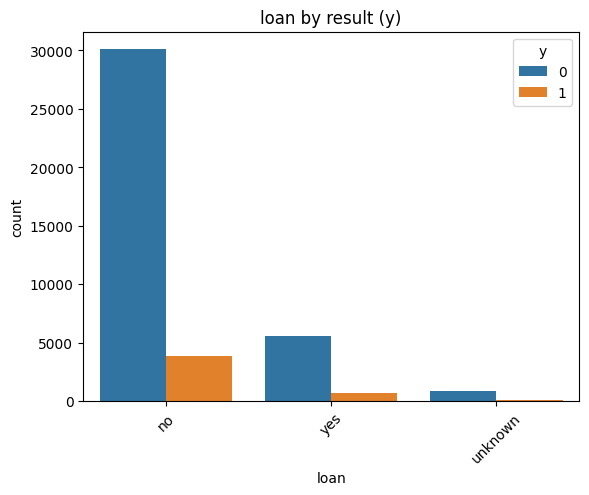

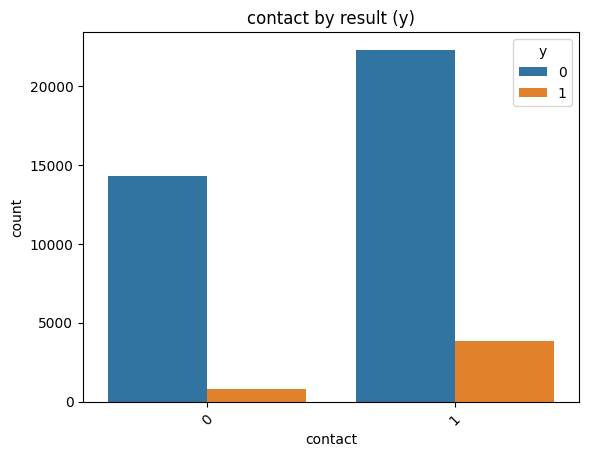

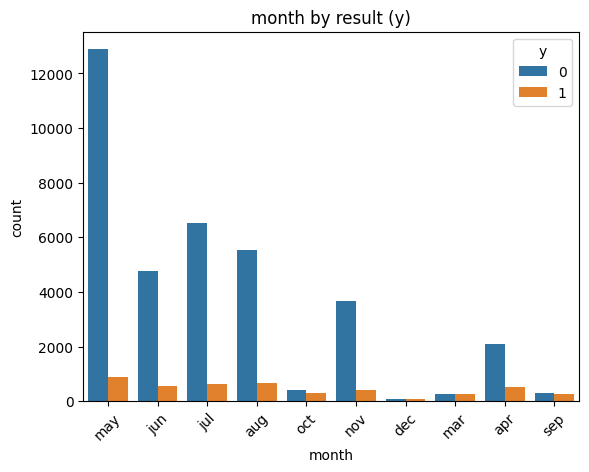

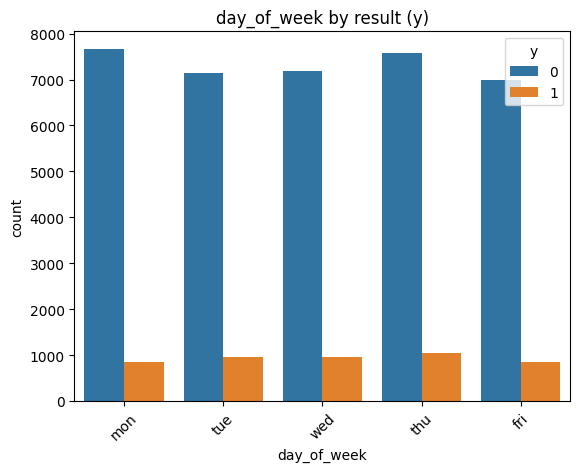

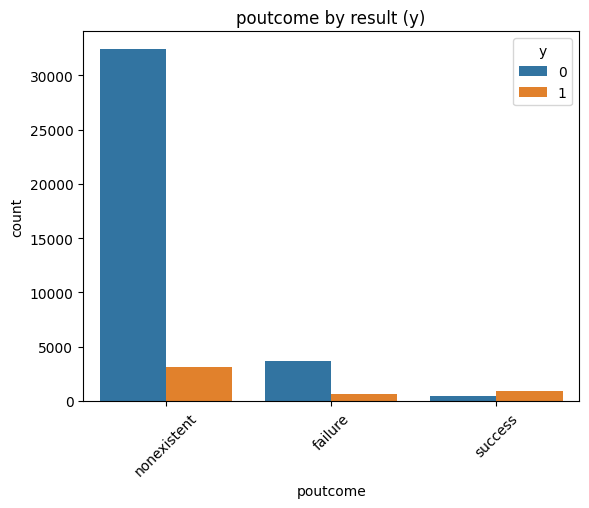

In [11]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in cat_cols:
    sns.countplot(x=col, hue='y', data=original)
    plt.title(f'{col} by result (y)')
    plt.xticks(rotation=45)
    plt.show()

As can be seen in the previous graphs, it seems that the results of the variable 'y' do not depend to a great extent on the categorical values either, it seems to maintain a similar proportion for each value except for 'success' of the variable 'poutcome', where the proportion is inverted with more positive values; and in the months of March, September, October and December, where the proportion of positive and negative results is equal.

Since the variables do not seem to have much or directly no correlation with the result to be predicted, the prediction models to be used will not be linear because it is understood that their accuracy will be very low. Furthermore, even though many variables appear to have no correlation, it has been decided not to exclude any of them because they are not considered to be variables that add noise and the prediction models are able to select the most important variables.

### Machine Learning Algorithims:

As mentioned above, due to the low correlation, it was decided to choose three models that do not depend on it, such as linear models, so it was decided to use Random Forest, XGBoost and Multilayer Perceptron (MLP). We will now proceed to generate each model, train it and show a brief evaluation of its up-to-dateness:

#### 1. Random Forest:

Before starting, Cross Validation will be used to determine the optimal hyperparameters for this situation.

In [12]:
def performanceAnalysis (test, pred):
    cm = confusion_matrix(test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix with {accuracy_score(test, pred):.2%} Accuracy')
    plt.show()

In [13]:
param_grid = {
    'n_estimators': [300, 350],
    'max_depth': [13, 14, 15, 16],
}

rf = RandomForestClassifier(min_samples_split = 3,
                            min_samples_leaf = 13,
                            max_features = 0.5, 
                            class_weight = None, 
                            random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Optimal hyperparameters:", grid_search.best_params_)

Optimal hyperparameters: {'max_depth': 15, 'n_estimators': 350}


Once the most optimal hyperparameters have been found for the model, it is tested and a confusion matrix is made to compare the expected results with those obtained and to calculate the accuracy of the model. In addition to the parameters that are tested in the cross-validation, the rest of the values that are fixed have also been adjusted. However, to speed up the execution of the code, they have been set directly to their optimal values.

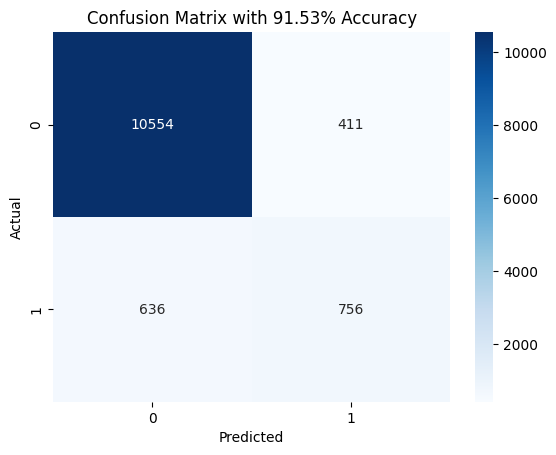

In [14]:
y_pred1 = grid_search.predict(x_test)
performanceAnalysis (y_test, y_pred1)

#### 2. XGBoost:

The next model is XGBoost, which is a boosting algorithm specialized in classification and regression tasks. For this case, Cross Validation is also used to optimize the hyperparameters.

In [15]:
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [7, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.25, 0.5, 0.75],
    'reg_lambda': [1, 2]
}

xgboost = xgb.XGBClassifier(learning_rate = 0.1, 
                            gamma = 1, 
                            objective='binary:logistic', 
                            use_label_encoder=False, 
                            eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Optimal hyperparameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\dorte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:46:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Optimal hyperparameters:
{'colsample_bytree': 0.8, 'max_depth': 9, 'n_estimators': 50, 'reg_alpha': 0.75, 'reg_lambda': 2, 'subsample': 1.0}


Once the most optimal hyperparameters for the model have been found, it is tested and a confusion matrix is made to compare the expected results with those obtained and to calculate the accuracy of the model. Furthermore, as with Random Forest, beyond the parameters that are tested in the cross-validation, the rest of the values that are fixed are also adjusted. However, to speed up the execution of the code, they have been set directly to their optimal values.

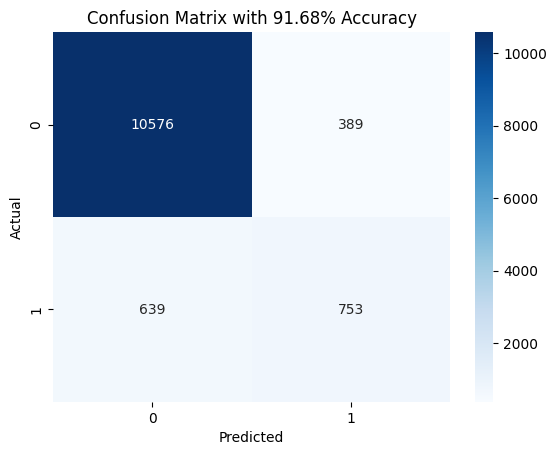

In [16]:
y_pred2 = grid_search.predict(x_test)
performanceAnalysis (y_test, y_pred2)

#### 3. Multilayer Perceptron (MLP):

Finally, there is MLP, a TensorFlow neural network model. In this case, as in the previous models, Cross Validation is used to choose the optimal hyperparameters.

In [17]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 25)],
    'alpha': [0.01, 0.1]
}

mlp = MLPClassifier(
    learning_rate='constant',
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(xScaled_train, y_train)

print("Optimal hyperparameters:")
print(grid_search.best_params_)

Optimal hyperparameters:
{'alpha': 0.1, 'hidden_layer_sizes': (100,)}


Once the most optimal hyperparameters for the model have been found, it is tested and a confusion matrix is made to compare the expected results with those obtained and to calculate the accuracy of the model. In addition, as with the two previous models, beyond the parameters that are tested in the cross-validation, the other values that are fixed are also adjusted. However, to speed up the execution of the code, they have been set directly to their optimal values.

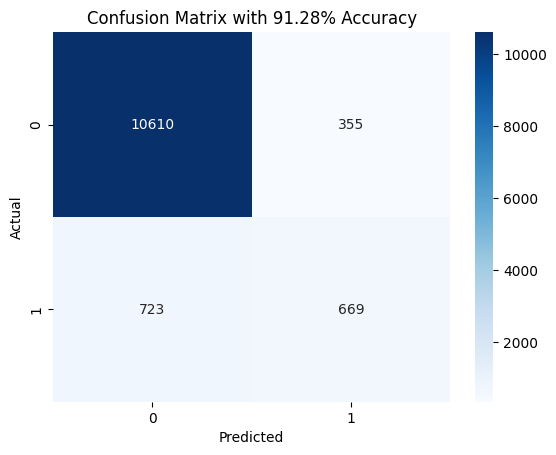

In [18]:
y_pred3 = grid_search.predict(x_test)
performanceAnalysis (y_test, y_pred3)

### Analysis of the performance:

So far, we have only seen the total accuracy percentage and the number of hits and misses for each possible prediction of each of the three models, but to compare more accurately the performance of each algorithm we are going to make a ranking report for each one.

In [19]:
print("=== Random Forest ===")
print(classification_report(y_test, y_pred1, target_names=['No','Yes']))

print("=== XGBoost ===")
print(classification_report(y_test, y_pred2, target_names=['No','Yes']))

print("=== Multilayer Perceptron ===")
print(classification_report(y_test, y_pred3, target_names=['No','Yes']))

=== Random Forest ===
              precision    recall  f1-score   support

          No       0.94      0.96      0.95     10965
         Yes       0.65      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357

=== XGBoost ===
              precision    recall  f1-score   support

          No       0.94      0.96      0.95     10965
         Yes       0.66      0.54      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357

=== Multilayer Perceptron ===
              precision    recall  f1-score   support

          No       0.94      0.97      0.95     10965
         Yes       0.65      0.48      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weight

As can be seen, with only the accuracy data and the confusion matrix, it is not possible to fully understand the performance of the models, because although the overall accuracy of the three is around 92 and 91%, it can be seen that the accuracy that the result is positive is much lower, reaching at best only 59%. 

In addition, it can be seen that the accuracy of the decision tree models is slightly better than the MLP, and between these two algorithms, it seems that the XGBoost is minimally better than the Random Forest.

### End of Jupiter notebook:

#### 1. Description of the algorithms, advantages and disadvantages and why their results are different:

In this study, 3 prediction algorithms have been used to predict whether or not a customer will make a term deposit. These algorithms have been: Random Forest (RF), XGBoost (XGB) and Multilayer Perceptron (MLP). Some of their characteristics are defined below, including advantages and disadvantages as well as why the results of a model vary from one to another.

The first model used was RF, which is a set of decision trees. Each tree is trained on a random sample of the data, and the results are averaged. This algorithm is characterized by: being robust to overfitting, tolerating irrelevant or correlated variables well, working well with categorical data transformed into binary data, not requiring data scaling, and being easy to interpret and debug, which can be very necessary. On the other hand, large models are slow to predict, do not capture complex nonlinear relationships such as neural networks, and may not be as accurate as XGBoost on more complex tasks.

The next model was XGB, a boosting algorithm that is also based on decision trees, where each new tree corrects the errors of the previous one and optimizes loss functions using gradients. This algorithm stands out for: being very accurate in data competitions (Kaggle, etc.), handling outliers and missing data well, having many parameters to tune the model and for being ideal for structured/tabular datasets. However, it is more complex to configure (many hyperparameters), it is easy to overfit if not regularized and it does not need scaling, but it does not work directly with categorical variables (they must be transformed).

Finally we have the MLP model, a feedforward neural network, composed of layers of neurons connected to each other and learning complex nonlinear relationships between variables. This algorithm is capable of learning complex nonlinear relationships, making it a good choice if the data has complicated interactions and is flexible in design (layers, nodes, etc.). Although, it requires scaled data, is sensitive to hyperparameters and training set size, it is much less interpretable than trees and slower in training and prediction than RF or XGBoost.

As can be seen, each model has characteristics that make it different in the way it learns patterns in the data. With tree assembly, RF does not learn from errors and partially captures nonlinearity, but this allows it to not need to scale the data and makes it have a low sensitivity to noise and a moderate tolerance to overfitting. XGB employs tree boosting, which allows it to: learn from its errors, not need scaling, better capture nonlinearity and a high tolerance to overfitting, but this also gives it a higher sensitivity to noise. Finally MLP employs a neural network that allows it to: learn from its errors, capture nonlinearity very well and has a high tolerance to overfitting, but still needs to scale the data and has a high sensitivity to noise.

#### 2. Comparison with prior work:

In the study by Moro, Cortez and Rita (2014), entitled A data-driven approach to predict the success of bank telemarketing, data mining techniques were applied on the same dataset used in this paper: the bank marketing dataset provided by a Portuguese bank, publicly available through the machine learning repository of the University of California, Irvine (UCI).

In that study, the authors analyzed records of telemarketing campaigns executed between 2008 and 2013. Their goal was to predict whether a customer would sign up for a long-term deposit, using only the information available before the phone call was made. Four classification models were evaluated: logistic regression, decision trees, support vector machines (SVM) and neural networks (MLP). For performance evaluation, they used two robust metrics: the area under the ROC curve (AUC) and the area under the cumulative gain curve (ALIFT). The best performing model was a multilayer neural network, which achieved an AUC of 0.794 and an ALIFT of 0.672 in a realistic evaluation scenario with moving windows.

On the other hand, in my work, I used three machine learning algorithms: Random Forest, XGBoost and Multilayer Perceptron (MLP). The first two used categorical variables transformed to binary, while the MLP was also applied on scaled data. The three models were adjusted by cross-validation to optimize their hyperparameters and evaluated on a test set. The results obtained were consistent with each other in terms of overall accuracy, with an accuracy of approximately 91-92% in all cases. However, a critical observation is that performance in the minority class, i.e., customers who did subscribe to the deposit, was lower: both Random Forest and XGBoost achieved a recall of 0.54 and an f1-score of 0.59 for that class, while the MLP obtained an even lower recall of 0.48 and an f1-score of 0.55.

These differences with respect to the Moro et al. study can be explained for several reasons. First, they applied deeper attribute engineering and implemented a semi-automatic feature selection process that reduced the number of variables to 22, based on domain knowledge and empirical experimentation. This approach probably helped to reduce overfitting and improve generalization.

Second, the neural network model used by the authors was carefully optimized: a set of networks, an ensemble of 7 MLPs, was trained with an architecture selected by hyperparameter search, which allowed capturing complex nonlinear relationships between variables. In contrast, my MLP model was simpler and, although tuned, did not include techniques such as ensemble or such an exhaustive search, which could explain its more limited performance, especially in the minority class.

Another important factor is the metric used. While Moro et al. base their evaluation on the AUC and the Lift curve, both metrics insensitive to class imbalance, my results are focused on classification metrics such as precision, recall and f1-score. This may influence the interpretation of the results, as high accuracy does not necessarily imply good performance in the minority class. In a context such as direct marketing, where the objective is to correctly identify the few customers who will accept the offer, recall in the positive class is a particularly relevant metric.

In summary, although the results obtained do not exceed those reported by Moro et al. they are considered consistent considering the methodological differences, and highlight the importance of preprocessing, attribute selection and careful choice of metrics in classification problems with unbalanced classes.

#### 3. How to Consider Biases, Interpretability and Ethics:

Let's start by defining what a bias is: a bias occurs when the model learns patterns that reflect inequities or misrepresentations in the data. This can lead to unfair or erroneous results, especially when decisions affect people (such as campaigns, loans, insurance, etc.).

In this case there can be bias in both the data and the models. In the case of the data, the dataset contains variables such as age, job, marital, education, which may be correlated with sensitive socioeconomic or demographic factors. Since the distribution of classes (and: whether they subscribed or not) is unbalanced, it can introduce bias towards the majority class and due to underrepresentation of certain profiles such as uneducated or over 60. On the other hand, models such as MLP and XGBoost, being more complex, can amplify discriminatory patterns if not controlled and although Random Forest is more stable, it can still learn from spurious correlations if the variables are poorly preprocessed.

In order to correct for bias in the study you can: check class balance and use techniques such as resampling, class_weight='balanced' or SMOTE; analyze the model with separate metrics by subgroups such as performance by age or education level; and eliminate or control variables that could cause indirect discrimination such as gender or race correlates if they exist.

Interpretability is important because in contexts such as marketing or banking, understanding why a model makes a decision is as important as accuracy. This is vital for trust, auditing and ethical responsibility.

Some steps that could be taken in this study are: using SHAP (SHapley Additive exPlanations), to understand which variables most influence individual predictions; showing variable importance in tree-based models; and creating visualizations by population segment to show model decisions.

Some key ethical considerations in model use are: ensuring consent for data collection and the purpose for which the models will be applied; checking whether the model is making decisions that unfairly affect certain groups; preventing model use from reinforcing economic or social inequalities; and trying to provide transparency and accountability by defining who is responsible for the model's automatic decisions.

Following the considerations and measures discussed above, good practices include: clearly documenting the intended uses of the model; reviewing whether sensitive variables are being used directly or indirectly; considering limiting the use of poorly interpretable models for critical decisions; and, if the model is to be applied in real life, including a human audit process.

#### 4. Conclusion:

This project has applied three machine learning algorithms: Random Forest, XGBoost and Multilayer Perceptron (MLP) to the bank marketing dataset, with the objective of predicting which customers will subscribe a term deposit.

After appropriate preprocessing (including variable transformation and scaling), the models were trained and evaluated using cross-validation. The results show that Random Forest and XGBoost obtained the best performances, with an accuracy of 92% and similar performance in predicting the positive class (recall ≈ 0.54). MLP showed slightly lower performance, with 91% accuracy and lower recall (0.48), probably due to its higher sensitivity to preprocessing and lack of advanced optimization.

Compared to the study by Moro et al. (2014), which achieved an AUC of 0.794 using an optimized neural network, the results obtained here are consistent but somewhat more modest, possibly due to less attribute engineering and differences in the metrics used. They also applied advanced variable selection techniques, which improved their predictive ability on the minority class.

The analysis highlights a limitation common to all models: low sensitivity to detect positive class, which is especially relevant in direct marketing. To improve this, it would be useful to apply balancing techniques such as SMOTE and to evaluate with more robust metrics such as AUC.

Finally, the importance of ethics, bias and interpretability has been considered, as automated decisions in banking campaigns should be accountable, explainable and non-discriminatory.

In summary, XGBoost and Random Forest were the most effective models in this case, although all showed room for improvement, especially in the detection of customers who do accept the commercial offer.